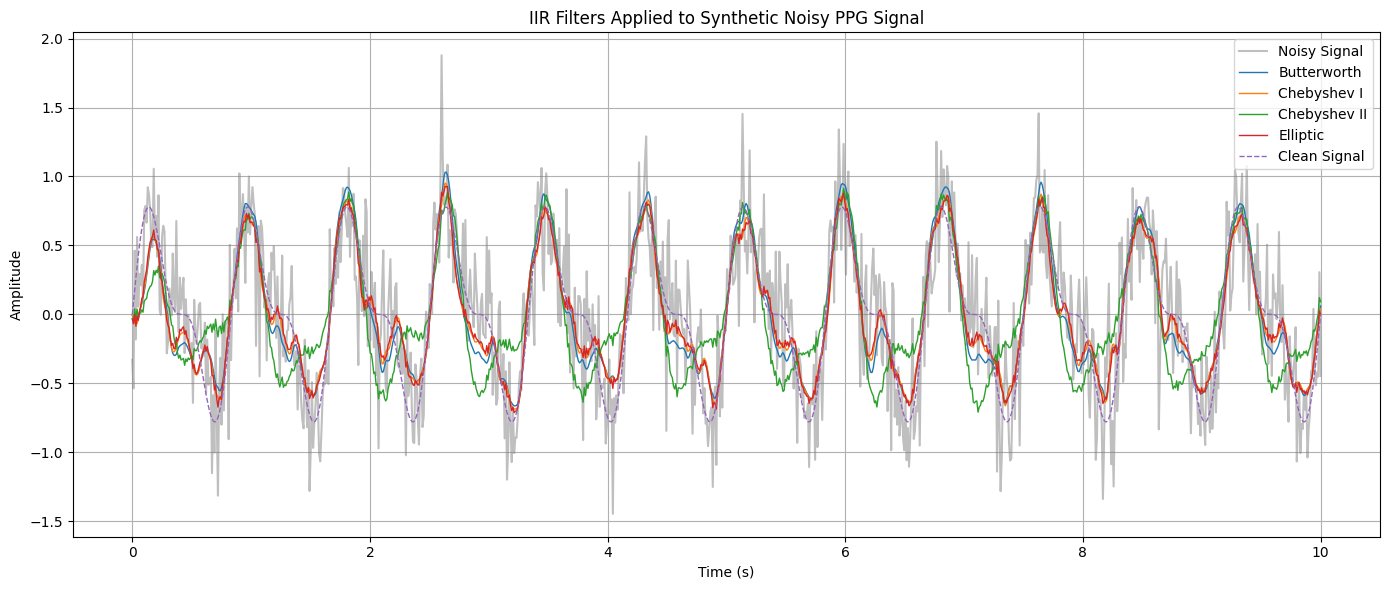

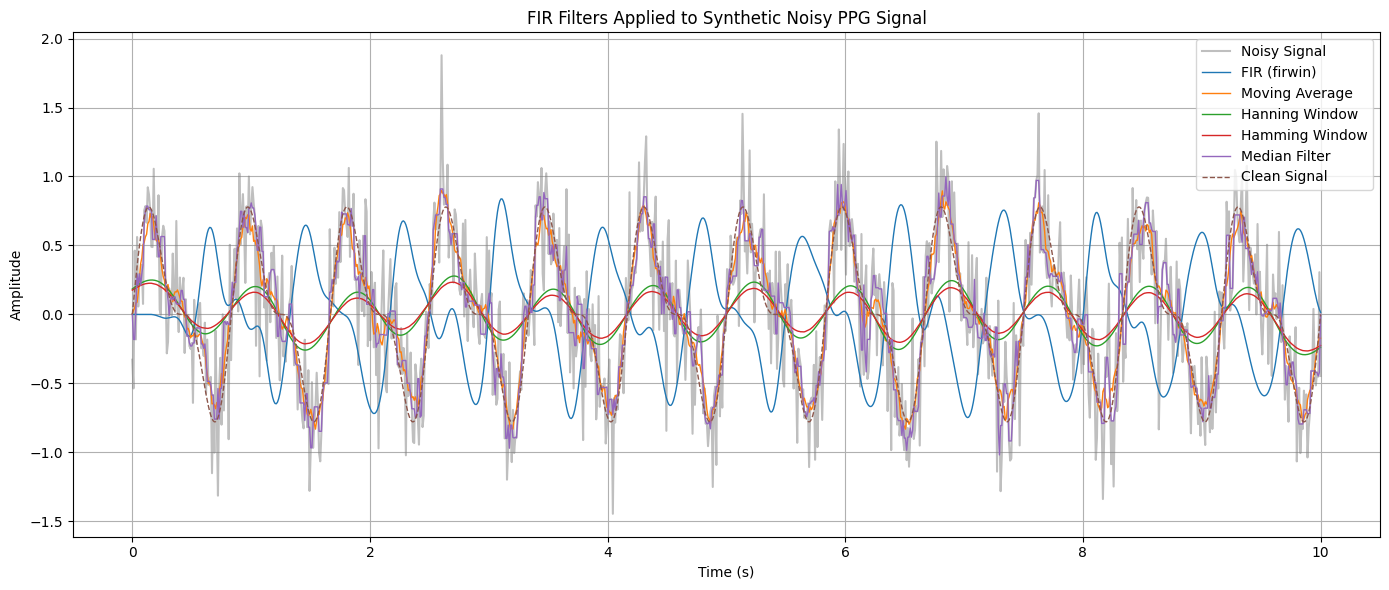

In [2]:
# PPG Signal Filtering: FIR vs IIR Filter Comparison

## Imports and Synthetic Signal Generation
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, cheby1, cheby2, ellip, firwin, lfilter, medfilt
from scipy.signal.windows import hamming, hann

# Sampling rate and time axis
fs = 100
T = 10  # seconds
t = np.linspace(0, T, fs * T)

# Clean synthetic PPG signal
ppg_clean = 0.6 * np.sin(2 * np.pi * 1.2 * t) + 0.3 * np.sin(2 * np.pi * 2.4 * t)
noise = 0.3 * np.random.randn(len(t))
ppg_noisy = ppg_clean + noise

## FIR Filters

# Moving Average Filter
def moving_average(signal, window_size):
    return np.convolve(signal, np.ones(window_size) / window_size, mode='same')

# Hanning Window Filter
def hanning_filter(signal, window_size):
    window = hann(window_size)
    return np.convolve(signal, window / window.sum(), mode='same')

# Hamming Window Filter
def hamming_filter(signal, window_size):
    window = hamming(window_size)
    return np.convolve(signal, window / window.sum(), mode='same')

# Median Filter
median_filtered = medfilt(ppg_noisy, kernel_size=5)

# FIR Filter using firwin (bandpass)
fir_coeff = firwin(numtaps=101, cutoff=[0.5, 5], pass_zero=False, fs=fs)
fir_filtered = lfilter(fir_coeff, 1.0, ppg_noisy)

# Window-based FIR filters
ma_filtered = moving_average(ppg_noisy, window_size=11)
hanning_filtered = hanning_filter(ppg_noisy, window_size=101)
hamming_filtered = hamming_filter(ppg_noisy, window_size=101)

## IIR Filters

def apply_iir_filter(signal, b, a):
    return lfilter(b, a, signal)

# Butterworth
b_butter, a_butter = butter(N=2, Wn=[0.5, 5], btype='bandpass', fs=fs)
butter_filtered = apply_iir_filter(ppg_noisy, b_butter, a_butter)

# Chebyshev Type I
b_cheby1, a_cheby1 = cheby1(N=2, rp=1, Wn=[0.5, 5], btype='bandpass', fs=fs)
cheby1_filtered = apply_iir_filter(ppg_noisy, b_cheby1, a_cheby1)

# Chebyshev Type II
b_cheby2, a_cheby2 = cheby2(N=2, rs=20, Wn=[0.5, 5], btype='bandpass', fs=fs)
cheby2_filtered = apply_iir_filter(ppg_noisy, b_cheby2, a_cheby2)

# Elliptic
b_ellip, a_ellip = ellip(N=2, rp=1, rs=20, Wn=[0.5, 5], btype='bandpass', fs=fs)
ellip_filtered = apply_iir_filter(ppg_noisy, b_ellip, a_ellip)

## Plotting IIR Filters
plt.figure(figsize=(14, 6))
plt.plot(t, ppg_noisy, label='Noisy Signal', color='gray', alpha=0.5)
plt.plot(t, butter_filtered, label='Butterworth', linewidth=1)
plt.plot(t, cheby1_filtered, label='Chebyshev I', linewidth=1)
plt.plot(t, cheby2_filtered, label='Chebyshev II', linewidth=1)
plt.plot(t, ellip_filtered, label='Elliptic', linewidth=1)
plt.plot(t, ppg_clean, label='Clean Signal', linestyle='--', linewidth=1)
plt.legend()
plt.title('IIR Filters Applied to Synthetic Noisy PPG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()

## Plotting FIR Filters
plt.figure(figsize=(14, 6))
plt.plot(t, ppg_noisy, label='Noisy Signal', color='gray', alpha=0.5)
plt.plot(t, fir_filtered, label='FIR (firwin)', linewidth=1)
plt.plot(t, ma_filtered, label='Moving Average', linewidth=1)
plt.plot(t, hanning_filtered, label='Hanning Window', linewidth=1)
plt.plot(t, hamming_filtered, label='Hamming Window', linewidth=1)
plt.plot(t, median_filtered, label='Median Filter', linewidth=1)
plt.plot(t, ppg_clean, label='Clean Signal', linestyle='--', linewidth=1)
plt.legend()
plt.title('FIR Filters Applied to Synthetic Noisy PPG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()